# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**About the data:** The data is from a Portuguese bank. It conducted advertising campaigns to try and get existing
customers to accept an attractive offer for a long-term deposit was made. The data is derived from 17 marketing campaigns that too placed between 2008 and 2010. The results were integrated into one data set. The campaigns were conducted by phone.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay
from sklearn.inspection import permutation_importance
import time, os
import warnings
warnings.filterwarnings("ignore")

In [2]:
cus_all = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
cus_all.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
cus_all

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```

#### 1. Input Data Categories:
 

1. bank client data
2. related with the last contact of the current campaign
3. other attributes
4. social and economic context attributes


**Conclusion on categories:** So not all the input data is about the customer but category 4 is about the wider context that may have influenced the customer's decision. If these features are influential then this suggests that campaign timing and economic context may play a substantial role alongside customer characteristics.

In [5]:
cus_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### 2. Missing data?

In [6]:
# Determining how many rows remain, if rows with literal NaN or empty strings are removed:
cus_NaN_less = (
    cus_all
    .replace(r'^\s*$', np.nan, regex=True)  # empty or whitespace-only strings
    .dropna()
)

percentage_remaining = 100 * len(cus_NaN_less) / len(cus_all)

print(f"\nRows remaining after removing NaN/empty: {percentage_remaining:.2f}%\n")


Rows remaining after removing NaN/empty: 100.00%



**Conclusion to missing data:**

Removing NaN/missing values removes no data!
So let's choose a short name for the data frame: 'cus'.

In [7]:
# Making the dataframe a short name 'cus' as the name for the reduced (reduced by 0) data frame:
cus = cus_NaN_less

#### 3. The feature 'duration' - Is this useful?

The data description says: "the duration is not known before a call is performed." That undertsandably means that this feature cannot be used in a properly predictive model since the duration of the call cannot be known before the call, when choosing who to call.

The paper includes the 'duration' of the call in their model. They found that call duration was by far the most influential feature for predicting the success of accepting the offer. They conclude that a manager could be "asking agents to increase the time of their calls." 

While this may potentially have benefits, it seems quite unlikely and there may be distinct disadvantages with trying to push call length longer. Why? Because interested customers are obviously wanting to talk more about the offer, but increasing the time for customers who are not interested will annoy them and you may lose them from banking with you completely. The call length will obviously be longer for those who do accept the offer because there are more details about what comes next that need to be discussed. So it was not the call length that caused the acceptance but rather it is the other way around - namely that the acceptance generated a longer call length. Overall there is a cause an effect issue.

**Conclusion:** It is best not to use call 'duration' in the model so that it is a truly predictive model that will inform management about who to call for higher yield results.

In [8]:
# Dropping the target and the 'duration' which is not known before the call
#    so it cannot be used in prediction to determine who to call
cus = cus.drop(columns=['duration'])

#### 4. Outliers? Data Quality?

What is the data quality? Are there a notable number of outliers?

**Note on 'pdays':**
1. This is the number of days that passed by after the client was last contacted from a previous campaign.
2. 999 means client was not previously contacted
3. How does 999 compare with the other pdays values?

In [9]:
pdays_999 = (cus['pdays'] == 999).sum()

# How many pdays have the value of 999?
print(f"\nHow many pdays have the value of '999' (no previous contact) for the 41188 rows?: {pdays_999}\n")


How many pdays have the value of '999' (no previous contact) for the 41188 rows?: 39673



  
  
**pdays=999 is:**  
39673 rows = 96.3% = the vast majority


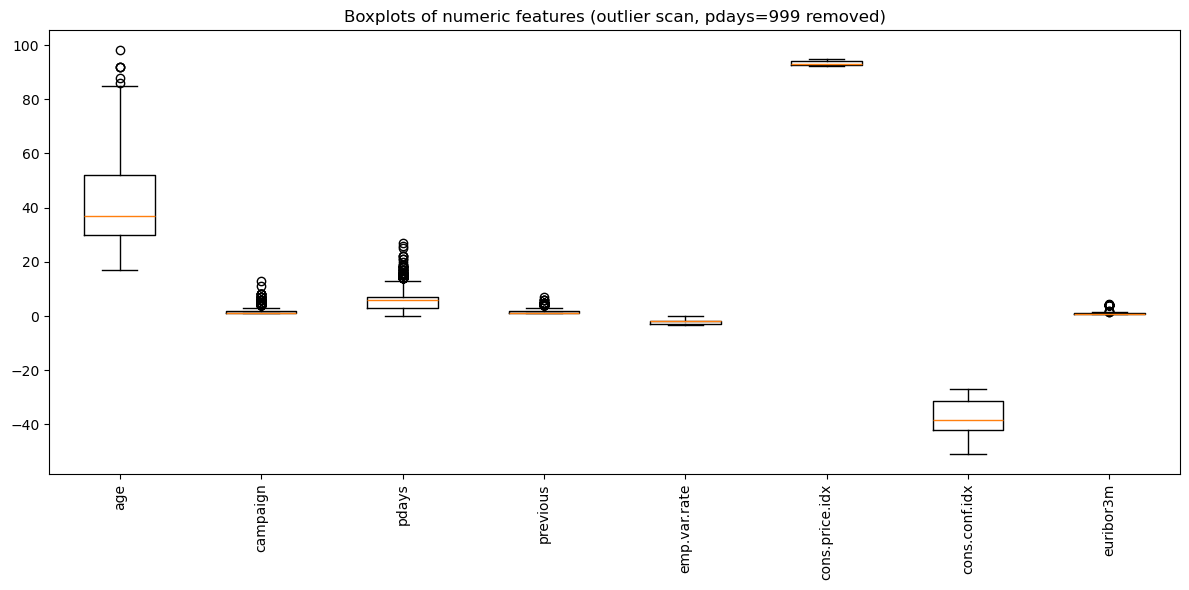

In [10]:
# Dropping duration and nr.employed from the boxplot set:
num_cols = (cus.select_dtypes(include=['int64', 'float64'])
              .columns
              .drop(['nr.employed'], errors='ignore'))

# remove rows where pdays == 999 (so those values don't appear in the plots)
cus_plot = cus[cus['pdays'] != 999].copy()

plt.figure(figsize=(12, 6))
plt.boxplot([cus_plot[c].dropna() for c in num_cols], labels=num_cols, showfliers=True)
plt.xticks(rotation=90)
plt.title("Boxplots of numeric features (outlier scan, pdays=999 removed)")
plt.tight_layout()
plt.show()

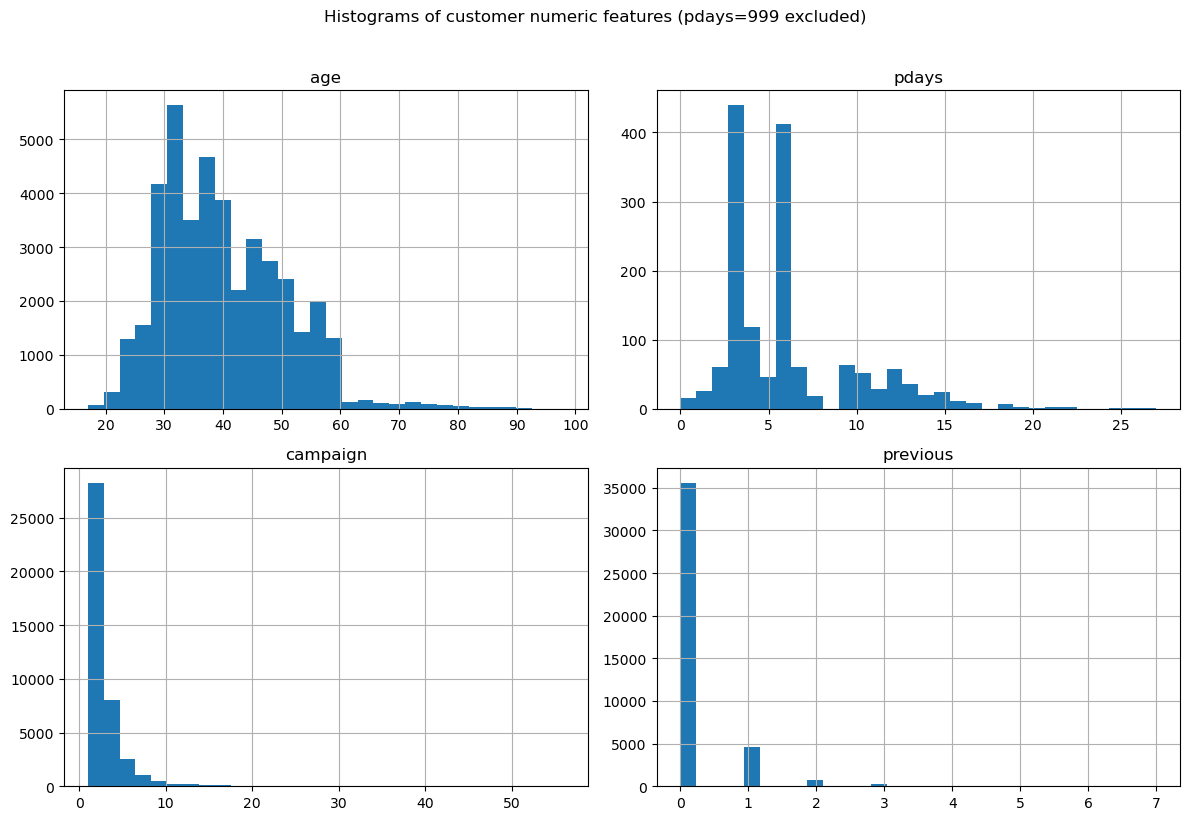

In [11]:
cols = ['age', 'pdays', 'campaign', 'previous']

# copy just the columns we need, then hide pdays=999 so the histogram scales to the other values
cus_plot = cus[cols].copy()
cus_plot.loc[cus_plot['pdays'] == 999, 'pdays'] = float('nan')

cus_plot.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of customer numeric features (pdays=999 excluded)", y=1.02)
plt.tight_layout()
plt.show()

In [12]:
num_cols = cus.select_dtypes(include=['int64', 'float64']).columns
Z = (cus[num_cols] - cus[num_cols].mean()) / cus[num_cols].std(ddof=0)

# count how many rows have any feature beyond 3 std devs
outlier_rows = (Z.abs() > 3).any(axis=1).mean() * 100
print(f"Rows with at least one |z| > 3: {outlier_rows:.2f}%")

Rows with at least one |z| > 3: 7.44%


**Conclusion to Outliers:**

1. Feature scaling will be required in the models because of very different magnitudes.
2. The boxplots and histograms reveal some skewness and outliers in several numeric variables (e.g., campaign, previous), but these represent legitimate customer behaviors rather than data errors.
3. The macro-economic variables show tight, stable ranges consistent with their definitions.
4. No variables exhibit implausible values, and outliers are retained. 

#### 5. Notable correlation in the data?


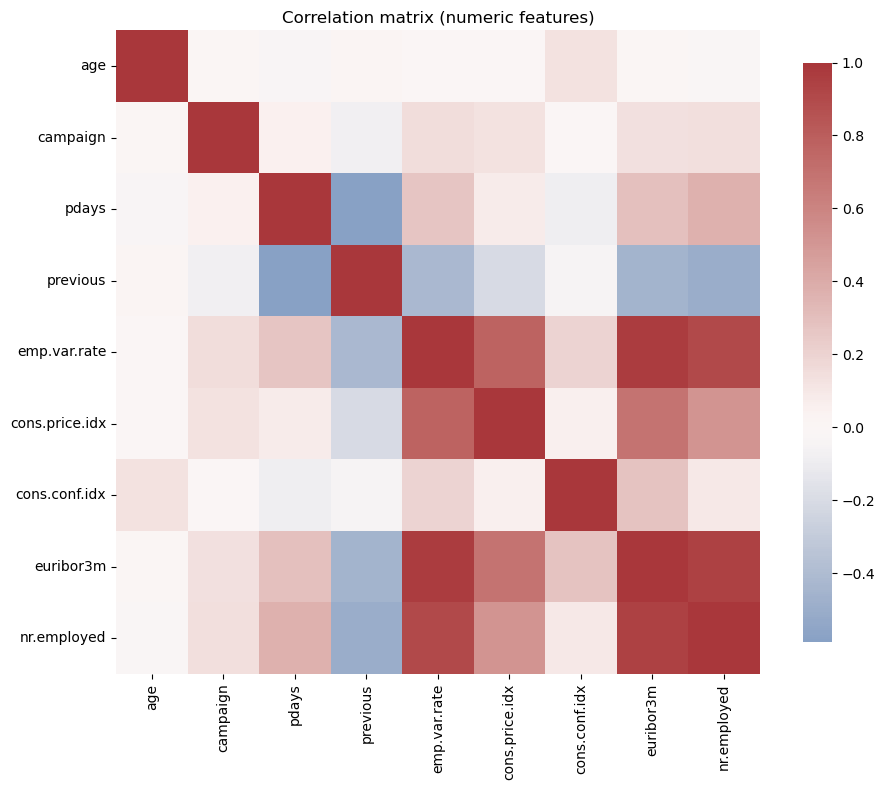

In [13]:
# Correlation matrix of numeric features
cus_corr = cus.select_dtypes(include="number").corr()

# Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cus_corr,
    annot=False,          # set True if you want numbers in cells
    cmap="vlag",          # or "coolwarm"
    center=0,
    square=True,
    cbar_kws={"shrink": 0.9}
)
plt.title("Correlation matrix (numeric features)")
plt.tight_layout()
plt.show()

**Conclusion to correlation:**

1. The most correlated numerical features are the external economic environment - they correlate with each other (many ≈ 0.8–0.95):  
        	•	emp.var.rate  
        	•	euribor3m  
        	•	nr.employed  
        	•	cons.price.idx (to a lesser degree)  

     So these coefficients may become unstable (especially in Logistic Regression), but in the end the regularisation will solve this.

2. Numerical data about the customer has low correlation (some seeming negative correlation, eg 'previous' and 'pdays' but this is affected by the many 999.

#### 6. Solving pdays = 999:

pdays=999 means "not previously contacted" (a separate state, not a time value)
pdays currently misrepresents reality with 999 appearing as “very old”

So we will make pdays into two features:  
    1. A binary of previously contacted (prev_contacted) which is 1 for 'was previously contacted' and 0 for 'not previously contacted'.  
    2. The number of days since the last contact but with NaN where 999 was. The NaN will be solved in preprocessing. 


In [14]:
# Add the new binary value feature of "previously contacted":
cus['prev_contacted'] = (cus['pdays'] != 999).astype(int)

# numeric "days since last contact" only defined when cus was previously contacted:
cus['pdays_since'] = cus['pdays'].replace(999, np.nan)

# drop the original 'pdays' so we don't keep the misleading numeric encoding:
cus = cus.drop(columns=['pdays'], errors='ignore')

#### 7. What value variability is there:


In [15]:
# Let's see what the different values are for each feature.
# This will tell us what feature has a short list of values
# and also what feature has a long list of values:

for col in cus.columns:
    print(f"\nColumn: {col}")
    print(cus[col].unique())


Column: age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Column: job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Column: marital
['married' 'single' 'divorced' 'unknown']

Column: education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Column: default
['no' 'unknown' 'yes']

Column: housing
['no' 'yes' 'unknown']

Column: loan
['no' 'yes' 'unknown']

Column: contact
['telephone' 'cellular']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Column: day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

Column: campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28

**Observations on value variability:**  
1. The column contact shows only the values 'telephone' and 'cellular'. There are no values of 'internet' etc.
2. Not all 12 months are represented
3. Prev contact is binary with only 0 or 1.
4. There are up to 43 campaigns.

#### 8. Overall conclusion for the understanding the features and data preparation:


1. The data is of high quality since there were no explicit NaN/missing values when we started.
2. The main issue was pdays having 999 to mean no previous contact. This is not missing or problematic data since it does tell us reall information.
3. pdays=999 is solved in a two step process. We have already split the feature into two (previous y/n & days previous) and the preprocessing pipeline will finish the solution. See below.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**The business goal:** This is to use the different features of a customer to predict when the customer will accept a special term deposit offer made in an advertising campaign. This will inform a bank as to which customers will more likely accept the offer but also when is the best timing for making an offer so that those particular customers can be targetted in future campaigns at the right time.

The call duration cannot be used for prediction since this is not known until an interaction with a customer is complete - at which point the outcome of accepting the offer is already known.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [16]:
# Define the target and the features to be used:
X = cus.drop(columns=['y'])
y = cus['y']

#### 1. How balanced is the target class? This affects metrics and models

In [17]:
# How unbalanced are the target classes?
print( y.value_counts() )
print()

# Encode the target variable to be 0 or 1 (instead of yes or no),
# because many scikit-learn models expect the target to be numbers.
le = LabelEncoder()
y = le.fit_transform(y)

y
no     36548
yes     4640
Name: count, dtype: int64



#### 2. A very imbalanced target class:

Percentage of 'no' compared with total contacts:

In [18]:
percent_no = 36548 / (36548+4640) * 100
print(f"\nPercentage of 'no' out of total customer contacts: { percent_no :.2f}%\n")


Percentage of 'no' out of total customer contacts: 88.73%



#### 3. PR AUC, rather than 'accuracy' will be our evalation metric for this very imbalanced target class:

Three other options apart from 'accuracy':  
- ROC AUC  
- ALIFT  
- PR AUC

PR AUC (Precision–Recall AUC) is what we will use because the target class (“accept deposit = yes”) is rare and the goal is to identify a smaller subset of customers with a higher likelihood of acceptance. PR AUC focuses directly on performance for the positive class and reflects the trade-off between precision and recall as customers are ranked by predicted probability. In contrast, ROC AUC might appear overly optimistic with this strong class imbalance, and ALIFT requires more implementation coding and interpretation (though it is intuitive to interpret for business).

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [19]:
# Split the data into train and test, 20% test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [20]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import average_precision_score

# Dummy baseline model: predicts class prior by default (strategy="prior")
dummy_clf = DummyClassifier(strategy="prior", random_state=42)
dummy_clf.fit(X_train, y_train)

y_score_dummy = dummy_clf.predict_proba(X_test)[:, 1]  # probability of class 1 ("yes")

baseline_pr_auc = average_precision_score(y_test, y_score_dummy)

print(f"Dummy Baseline PR AUC (Average Precision): {baseline_pr_auc:.6f}\n")
print("(This is essentially the positive class rate baseline.)")

Dummy Baseline PR AUC (Average Precision): 0.113498

(This is essentially the positive class rate baseline.)


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [21]:
from sklearn.impute import SimpleImputer

# Create Python lists of the categorical and the numerical features:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()


# NEW: numeric pipeline = impute then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Preprocessor, according to the Python lists for numerical/categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

# The simple pipeline with just mostly default Logistic Regression:
LR_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("logisticregression", LogisticRegression(max_iter=1000))
])

### Problem 9: Score the Model

What is the accuracy of your model?

Model,Train Time,Train PR AUC,Test PR AUC
Dummy (Baseline),-,-,0.113498
Logistic Regression,0.165880,0.463775,0.428511


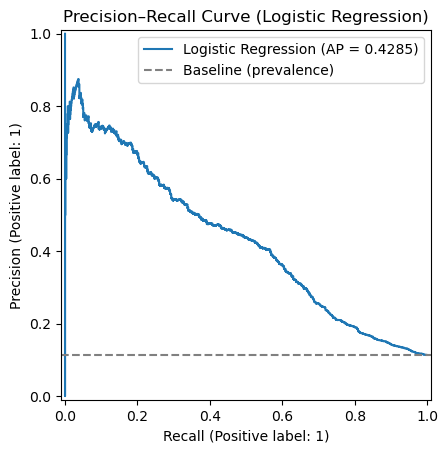

In [22]:
results = []

# --- train timing ---
start = time.time()
LR_pipeline.fit(X_train, y_train)
train_time = time.time() - start

# --- PR AUC scores ---
y_train_score = LR_pipeline.predict_proba(X_train)[:, 1]
y_test_score  = LR_pipeline.predict_proba(X_test)[:, 1]

train_pr_auc = average_precision_score(y_train, y_train_score)
test_pr_auc  = average_precision_score(y_test, y_test_score)


# baseline row added to the table results:
results.append([
    "Dummy (Baseline)",
    "-",
    "-",
    baseline_pr_auc
])

# model's results added to the results table:
results.append(["Logistic Regression", train_time, train_pr_auc, test_pr_auc])

results_df = pd.DataFrame(
    results,
    columns=["Model", "Train Time", "Train PR AUC", "Test PR AUC"]
)

# Display the results table:
print()
display(results_df.style.hide(axis="index"))
print()

# --- Plot the Precision-Recall (PR) curve plot ---
ap = average_precision_score(y_test, y_test_score)
disp = PrecisionRecallDisplay.from_predictions(y_test, y_test_score)

# Baseline = positive class prevalence (horizontal line)
disp.ax_.axhline(y=y_test.mean(), linestyle="--", color="gray", label="Baseline (prevalence)")

# Rename the PR curve line (from 'Classifier') and get 4 decimal places (not default of 2)
disp.line_.set_label(f"Logistic Regression (AP = {ap:.4f})")

disp.ax_.set_title("Precision–Recall Curve (Logistic Regression)")
disp.ax_.legend()

**Conclusion to Simple Model Performance:**

Without tuning any hyper-parameters, we have a notable increase in the model's performance over the dummy baseline.  
From 0.113498 (dummy baseline) to 0.428511 (Simple Logistic Regression).

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [23]:
# -------------------------------------------------
#  1. Models to compare (mostly default parameters)
# -------------------------------------------------

models = {
    'knn': (KNeighborsClassifier(), {}),
    'logisticregression': (LogisticRegression(max_iter=1000), {}),
    'svc': (SVC(), {}),
    'decisiontreeclassifier': (DecisionTreeClassifier(random_state=42), {})
}

results = []
pr_curves = {}
pr_auc_scores = {}


In [24]:
# -------------------------------------------------
#  2. Baseline (REUSE from Problem 7 – do NOT refit)
# -------------------------------------------------
# Assumes:
#   - dummy_clf already fitted in Problem 7
#   - X_test, y_test already exist

dummy_probs = dummy_clf.predict_proba(X_test)[:, 1]
baseline_pr_auc = average_precision_score(y_test, dummy_probs)


In [25]:
# -------------------------------------------------
#  3. Fit each model and collect metrics
# -------------------------------------------------

def get_pr_scores(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    return model.decision_function(X)

pr_curves = {}         
pr_auc_scores = {}     
results = []   

for name, (estimator, params) in models.items():
    
    # ---- build pipeline ----
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", estimator)
    ])
    pipe.set_params(**params)

    # ---- training time ----
    start_train = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - start_train
    
    # ---- PR metrics ----
    y_train_score = get_pr_scores(pipe, X_train)
    y_test_score  = get_pr_scores(pipe, X_test)

    precision, recall, _ = precision_recall_curve(y_test, y_test_score)

    pr_curves[name] = (recall, precision)
    pr_auc_scores[name] = test_pr_auc

    train_pr_auc = average_precision_score(y_train, y_train_score)
    test_pr_auc  = average_precision_score(y_test, y_test_score)

    results.append([name, train_time, train_pr_auc, test_pr_auc])


In [26]:
# -------------------------------------------------
# 4. Results table (Dummy first, then the models)
# -------------------------------------------------
results_df = pd.DataFrame(
    results,
    columns=["Model", "Train Time", "Train PR AUC", "Test PR AUC"]
).sort_values("Test PR AUC", ascending=False).reset_index(drop=True)

pr_auc_map = results_df.set_index("Model")["Test PR AUC"].to_dict()


print("\nBest performance for each model:\n\n")
display(results_df.style.hide(axis="index"))
print()
print()


Best performance for each model:




Model,Train Time,Train PR AUC,Test PR AUC
logisticregression,0.157941,0.463775,0.428511
svc,35.957697,0.626131,0.388641
knn,0.048500,0.578831,0.311201
decisiontreeclassifier,0.163357,0.998579,0.181658


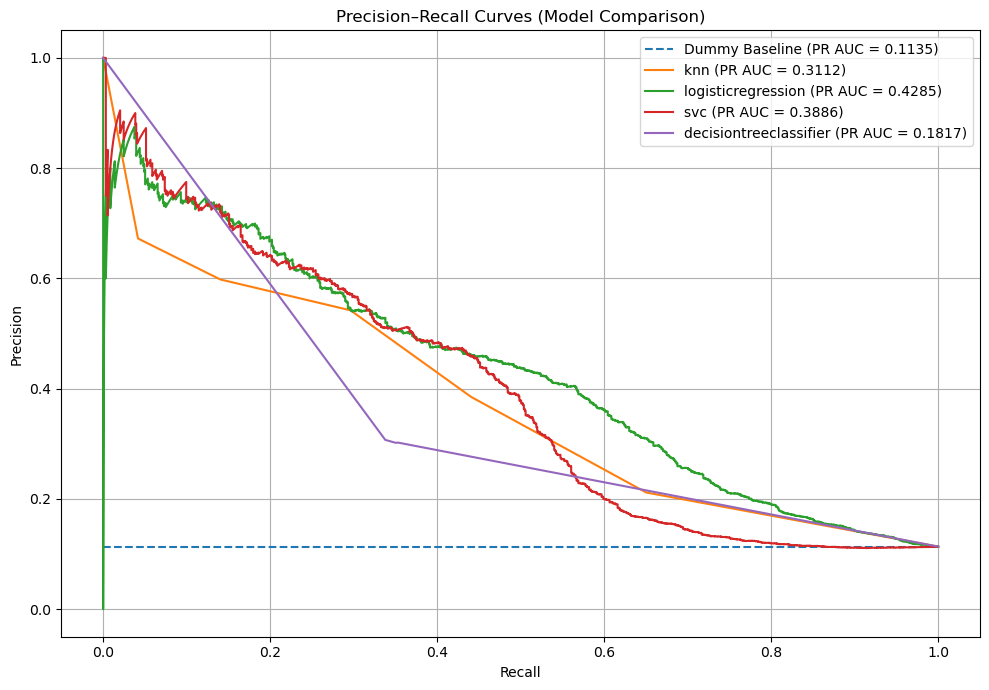

In [27]:
# -------------------------------------------------
#  5. Combined PR Curve Plot (reuse fitted models)
# -------------------------------------------------

plt.figure(figsize=(10, 7))

# Dummy baseline
plt.plot([0, 1], [baseline_pr_auc, baseline_pr_auc],
         linestyle="--",
         label=f"Dummy Baseline (PR AUC = {baseline_pr_auc:.4f})")

# Models
for name, (recall, precision) in pr_curves.items():
    plt.plot(recall, precision, label=f"{name} (PR AUC = {pr_auc_map[name]:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves (Model Comparison)")
plt.legend(loc="best")   # or bbox_to_anchor=(1.02, 1), loc="upper left"
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusion:**  Logistic Regression is performing the best with just using mainly defaults for the hyper-parameters.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyper-parameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### A. Tuning the hyper-parameters via GridSeachCV


In [28]:
# -------------------------------------------------
#  1. Set hyper-parameter options to improve model
# -------------------------------------------------


models = {
    "knn": (
        KNeighborsClassifier(),
        {
            "model__n_neighbors": [3, 5, 7]
        }
    ),
    "logisticregression": (
        LogisticRegression(max_iter=2000),
        {
            # First parameters in Problem 11,
            #  before Logistic Regression 'won' (with C=3): 
            "model__C": [0.01, 0.1, 1, 2, 3, 4, 5, 10],    

            # Then with a second run of this Problem 11 code,
            #  since Logistic Regression was so fast,
            #  I added l2 and also "liblinear","saga":         
            "model__penalty": ["l2", "l1"],
            "model__solver": ["lbfgs","liblinear","saga"],
        }
    ),
    "svc": (
        SVC(),
        {
            "model__C": [0.01, 0.1, 1, 2],
            "model__kernel": ["linear", "rbf"]
        }
    ),
    "decisiontreeclassifier": (
        DecisionTreeClassifier(),
        {
            "model__max_depth": [5, 10, 15]
        }
    )
}

results = []
pr_curves = {}
pr_auc_scores = {}


In [29]:
# -------------------------------------------------
#  2. Baseline (REUSE from Problem 7 – do NOT refit)
# -------------------------------------------------
# Assumes:
#   - dummy_clf already fitted in Problem 7
#   - X_test, y_test already exist

dummy_probs = dummy_clf.predict_proba(X_test)[:, 1]
baseline_pr_auc = average_precision_score(y_test, dummy_probs)


In [30]:
# -------------------------------------------------
#  3. Fit each model and collect metrics
# -------------------------------------------------

def get_pr_scores(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    return model.decision_function(X)

results = []            
pr_curves = {}          # store PR curve points
pr_auc_scores = {}      # store test PR AUC per model
tuning_results = []     # store tuning metadata (separate from table)

for name, (estimator, params) in models.items():

    print(f"\nStarting {name} at {time.ctime()}", flush=True)

    # ---- build pipeline ----
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", estimator)
    ])

    grid_search = GridSearchCV(
        pipe,
        param_grid=params,
        scoring="average_precision",
        cv=5,
        n_jobs=1,
        verbose=2
    )

    # ---- total training time ----
    start_model_total = time.time()
    grid_search.fit(X_train, y_train)
    model_total_time = time.time() - start_model_total

    
    # ---- training time (BEST hyper-parameters only) ----
    # refit_time_ = time to refit best estimator on full training set
    train_time = getattr(grid_search, "refit_time_", None)

    print(f"Finished {name} in {model_total_time/60:.6f} min at {time.ctime()}", flush=True)
    print(f"Finished {name} best parameters (refit) in {train_time/60:.6f} min", flush=True)
    

    # ---- best model + params ----
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    cv_best_ap = grid_search.best_score_

    # ---- PR scores ----
    y_train_score = get_pr_scores(best_model, X_train)
    y_test_score  = get_pr_scores(best_model, X_test)

    # ---- PR metrics ----
    train_pr_auc = average_precision_score(y_train, y_train_score)
    test_pr_auc  = average_precision_score(y_test, y_test_score)

    # ---- PR curve ----
    precision, recall, _ = precision_recall_curve(y_test, y_test_score)
    pr_curves[name] = (recall, precision)
    pr_auc_scores[name] = test_pr_auc

    # ---- append TABLE ROW (list-of-lists ONLY) ----
    results.append([
        name,
        train_time,
        train_pr_auc,
        test_pr_auc
    ])

    # ---- keep tuning metadata separate ----
    tuning_results.append({
        "Model": name,
        "Best Params": best_params,
        "Best CV AP": cv_best_ap
    })

print("\nDone.\n")


Starting knn at Fri Feb  6 21:58:09 2026
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...............................model__n_neighbors=3; total time=   0.2s
[CV] END ...............................model__n_neighbors=3; total time=   0.2s
[CV] END ...............................model__n_neighbors=3; total time=   0.2s
[CV] END ...............................model__n_neighbors=3; total time=   0.2s
[CV] END ...............................model__n_neighbors=3; total time=   0.2s
[CV] END ...............................model__n_neighbors=5; total time=   0.2s
[CV] END ...............................model__n_neighbors=5; total time=   0.2s
[CV] END ...............................model__n_neighbors=5; total time=   0.2s
[CV] END ...............................model__n_neighbors=5; total time=   0.2s
[CV] END ...............................model__n_neighbors=5; total time=   0.2s
[CV] END ...............................model__n_neighbors=7; total time=   0.2s
[CV] EN

#### B. Result Table from GridSearchCV & Best Model:


In [31]:
#  Results table:
results_df = pd.DataFrame(
    results,
    columns=["Model", "Train Time", "Train PR AUC", "Test PR AUC"]
).sort_values("Test PR AUC", ascending=False).reset_index(drop=True)

print("\nBest performance for each model:\n")
display(results_df)
print("'Train Time' is for each best model to refit, which differs from the GridSearchCV.\n")

#  Best Model:
best_model_name = results_df.loc[0, "Model"]
print("\nBest overall model:", best_model_name)

best_params_row = next(r for r in tuning_results if r["Model"] == best_model_name)
print("Best params:", best_params_row["Best Params"], "\n\n")


Best performance for each model:



,Model,Train Time,Train PR AUC,Test PR AUC
0,logisticregression,0.150324,0.463807,0.429126
1,decisiontreeclassifier,0.082598,0.439709,0.388939
2,svc,17.213280,0.523099,0.381599
3,knn,0.047706,0.546725,0.338226


'Train Time' is for each best model to refit, which differs from the GridSearchCV.


Best overall model: logisticregression
Best params: {'model__C': 3, 'model__penalty': 'l2', 'model__solver': 'lbfgs'} 




#### C. Visual Comparison of Best Models:


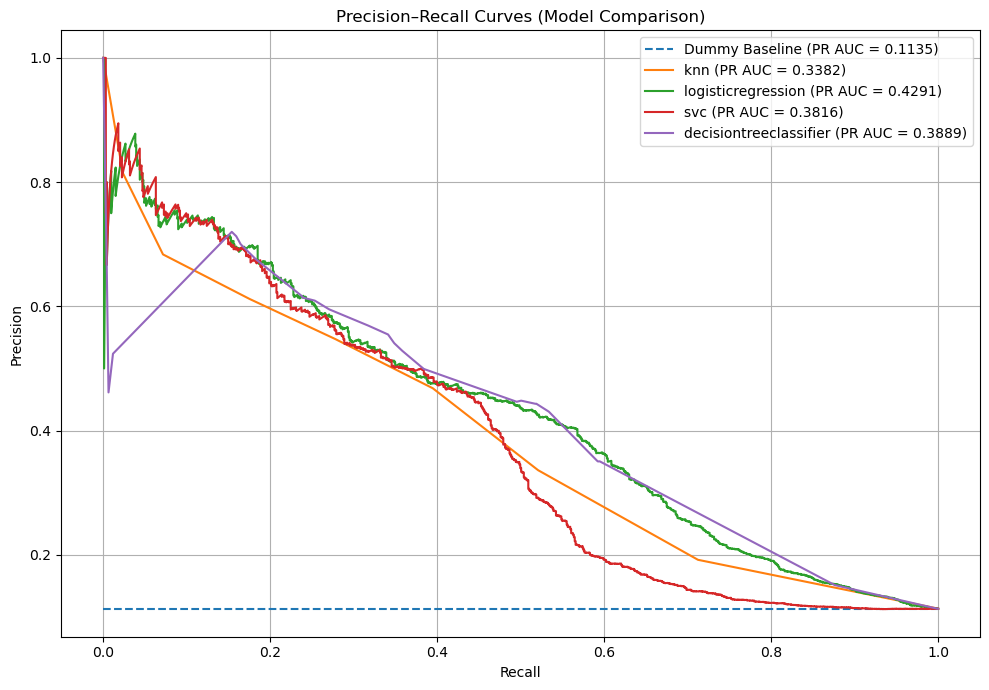

In [32]:
# -------------------------------------------------
#  5. Combined PR Curve Plot (reuse fitted models)
# -------------------------------------------------

plt.figure(figsize=(10, 7))

# Dummy baseline
plt.plot([0, 1], [baseline_pr_auc, baseline_pr_auc],
         linestyle="--",
         label=f"Dummy Baseline (PR AUC = {baseline_pr_auc:.4f})")

# Models
for name, (recall, precision) in pr_curves.items():
    plt.plot(recall, precision,
             label=f"{name} (PR AUC = {pr_auc_scores[name]:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves (Model Comparison)")
plt.legend(loc="best")   # or bbox_to_anchor=(1.02, 1), loc="upper left"
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion to tuning of the hyper-parameters:

Overall, the tuned Logistic Regression is the best-performing and most practical model for this imbalanced classification task.

The hyper-parameters of the best model:

    Best overall model: logisticregression
    Best params: {'model__C': 3, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

This Logistic Regression with C=3 obtained the highest PR AUC of 0.429126 (well above the next highest which was the decision tree classifier with 0.386643). So a moderate regularisation of C=3 performed the best (not too stong C=0.01 nor too weak C=10).

The L2-regularised model outperformed the L1-regularised alternative, indicating that predictive information is spread across many features rather than being concentrated in a small number of highly influential variables.

The best configuration used the default LBFGS solver which is consistent with an L2-regularised Logistic Regression.

Hyperparameter tuning (using GridSearchCV) produced only a marginal improvement over the untuned baseline models. Logistic Regression already performed strongly with default settings (Test PR AUC ≈ 0.4285), and tuning C produced a very small gain (≈ 0.4291 in the tuned run).

**Compare/Contrast to the other models:**

Logistic regression was an order of magnitude slower for this best model than KNN and Decision Trees. However Logistic regression was two orders of magnitude faster than SVC. I had included C=10 for SVC at one point but this took 10 hours for its GridSearchCV with no better performance.

It is interesting that SVC was the best performing model in the reseach paper, not Logistic Regression. Affecting this was undoubtly that the research paper included call 'duration' in its model which can't be known at the time of choosing which customers to contact.


#### Informing Business Decisions:

We now turn to how those results can be interpreted and used by managers within the bank (an a contracted marketing organisation).

#### A. What can we learn from the best model? ... A Lift Table

In [33]:
# ===========================================================================
# 'Acceptances' in the Test Data for a slice of the top k% of the Test Data:
#  (After sorting the Test Data by the customers' likelihood of acceptance)
# ===========================================================================

def topk_report(y_true, y_score, k=0.20):
    # Function creates one line for a k value in the results table
    
    y_true = np.asarray(y_true).astype(int)
    y_score = np.asarray(y_score)

    n = len(y_true)
    k_n = int(np.ceil(k * n))

    # sort by score descending
    order = np.argsort(-y_score)
    top_idx = order[:k_n]

    positives_total = int(y_true.sum())
    base_rate = y_true.mean() if n > 0 else np.nan

    positives_in_topk = int(y_true[top_idx].sum())
    precision_at_k = y_true[top_idx].mean() if k_n > 0 else np.nan
    lift_at_k = (precision_at_k / base_rate) if (base_rate and base_rate > 0) else np.nan
    capture_at_k = (positives_in_topk / positives_total) if positives_total > 0 else np.nan

    return {
        "Percentage_at_Top": k,                  # fraction, formatted as %
        "Rows in Slice": k_n,
        "Acceptances": positives_in_topk,
        "Percentage Accepted": precision_at_k,   # formatted as %
        "Lift": lift_at_k,
        "Capture": capture_at_k                  # formatted as %
    }, n, base_rate, positives_total


# ---- Build the Result Table ----
ks = [0.05, 0.10, 0.20, 0.30]

rows = []
n_test = None
base_rate = None
positives_total = None
y_score = best_model.predict_proba(X_test)[:, 1]

for k in ks:
    row, n_test, base_rate, positives_total = topk_report(y_test, y_score, k=k)
    rows.append(row)

df_lift = pd.DataFrame(rows)

# ---- Formatting the Results Table ----
df_show = df_lift.copy()

# Percentage columns
df_show["Percentage_at_Top"] = (df_show["Percentage_at_Top"] * 100).round(0).astype(int).astype(str) + "%"
df_show["Percentage Accepted"] = (df_show["Percentage Accepted"] * 100).round(0).astype(int).astype(str) + "%"
df_show["Capture"] = (df_show["Capture"] * 100).round(0).astype(int).astype(str) + "%"

# numeric rounding
df_show["Lift"] = df_show["Lift"].round(2)

# ---- print header lines + table ----
print("\n'ACCEPTANCES’ IN THE TEST DATA FOR A SLICE OF THE TOP K% OF THE TEST DATA:\n")
print("(After sorting the Test Data by the customers' likelihood of acceptance)")
print(f"Test rows: {n_test:,} | Total acceptances: {positives_total:,} | Base acceptance rate: {base_rate:.2%}\n")

df_show




'ACCEPTANCES’ IN THE TEST DATA FOR A SLICE OF THE TOP K% OF THE TEST DATA:

(After sorting the Test Data by the customers' likelihood of acceptance)
Test rows: 8,238 | Total acceptances: 935 | Base acceptance rate: 11.35%



,Percentage_at_Top,Rows in Slice,Acceptances,Percentage Accepted,Lift,Capture
0,5%,412,248,60%,5.30,27%
1,10%,824,398,48%,4.26,43%
2,20%,1648,561,34%,3.00,60%
3,30%,2472,625,25%,2.23,67%


#### B. What does the Lift Table tell us?

We can see that instead of a base acceptance rate of 11.35% for all customer in the past, we can potentially inrease the likelihood of acceptance of the term deposit offer by targettting specific groups of customers.

Targetting the top 5% (as sorted by our model) is likely to yield dramatically more accpetances for the Term Deposit offer (potentially 60%). However, this is only 5% of customers so even if 60% did accept, that is not that many new Term Depsits.  

	• The top 5% is extremely concentrated (60% hit rate).
	• Expanding to 10% still gives strong returns (adds potentially 144 acceptances from 412).
	• Expanding to 20% is reasonable but clearly weaker (add 170 but from 824 customers).
	• Expanding beyond 20% shows sharp diminishing returns (adds only 64 from 824 customers).

Most of the value is captured early. After ~20% of the ranked population, each additional customer contacted yields far fewer acceptances.

#### C. The most significant customer features: 

There is a mixture of types of features in the data and so in the model.  
What can we learn about and from the different types of data?  
   



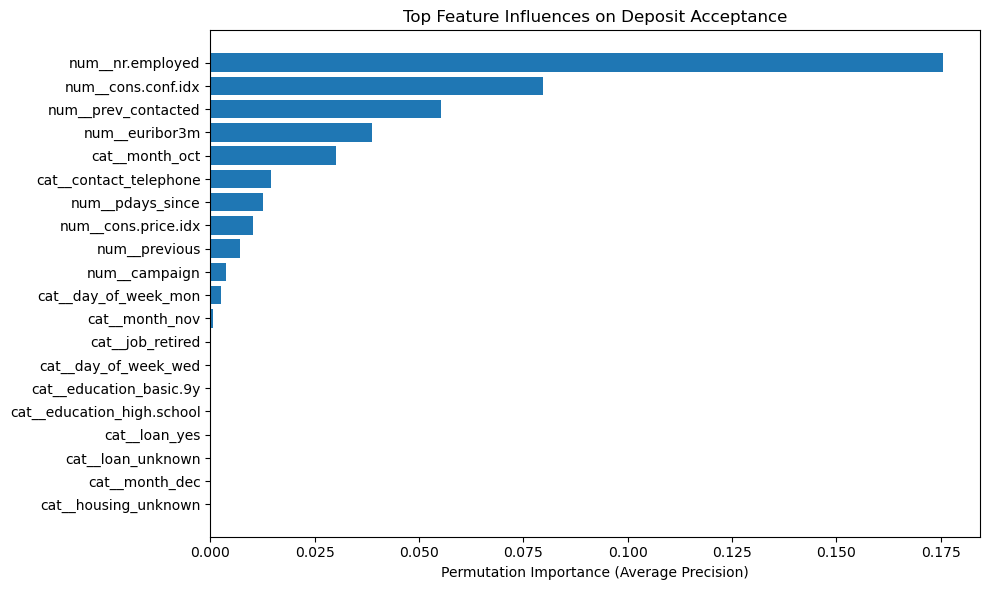

In [34]:
# --------------------------------------------------------
#    1. Transform X_test exactly as the model sees it
# --------------------------------------------------------
X_test_transformed = \
    best_model.named_steps["preprocessor"].transform(X_test)

feature_names = \
    best_model.named_steps["preprocessor"].get_feature_names_out()

# --------------------------------------------------------
#    2. Permutation importance on the transformed data
# --------------------------------------------------------
perm = permutation_importance(
    best_model.named_steps["model"],
    X_test_transformed,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring="average_precision"
)

imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": perm.importances_mean
}).sort_values("importance", ascending=False)

# --------------------------------------------------------
#    3. Classify features into strategic groups
# --------------------------------------------------------
def classify_feature(name):
    if any(x in name for x in [
        "emp.var.rate",
        "cons.price.idx",
        "cons.conf.idx",
        "euribor3m",
        "nr.employed"
    ]):
        return "Macro-economic environment"
    if any(x in name for x in [
        "month",
        "day_of_week"
    ]):
        return "Campaign timing"
    return "Customer characteristics"

imp_df["category"] = imp_df["feature"].apply(classify_feature)

# --------------------------------------------------------
#    4. Plot top individual features
# --------------------------------------------------------
top_n = 20

plt.figure(figsize=(10, 6))
plt.barh(
    imp_df.head(top_n)["feature"][::-1],
    imp_df.head(top_n)["importance"][::-1]
)
plt.xlabel("Permutation Importance (Average Precision)")
plt.title("Top Feature Influences on Deposit Acceptance")
plt.tight_layout()
plt.show()


#### The most significant customer features: 

The bar chart has very useful information. From the relative importance of the features, we can readily see that the employment rate at the time of the campaign had by far the most impact on the acceptance of the Term Deposit offer. So it was not something specific to the customer but rather the features of the economic climate.

There are also lessons for the timing of a campaign since October is a prominent feature. So also is contacting on a Monday (though less so). Choosing the day costs very little. Waiting for October does delay new Term Deposits.

More ambiguous is the number of previous contacts which suffers from causal ambiguity. Did more interest result in more contacts or did more contacts resulted in interest? An interested customer may be open to additional contacts but that does not necessarily mean that increasing contacts would help a disinterested person over the line of acceptance. They may feel pressured and lose interest.

The contact method that performed the best was 'telephone' (not 'cellular'). Since the period of the campaign (2008 to 2010), less customers would have non-cellular phones. However, if they did still have a landline then that should be flagged as the preferred method of calling since it is the 6th most influential feature out of the two calling options.

It will be worthwhile to group the category type of the features so we know how much all the timing features contribute, when compared with the macro-economic features, when compared with specifics about the customer. Le'ts turn to that now.


#### D. The relative importance of the overall category types of the features: 


   



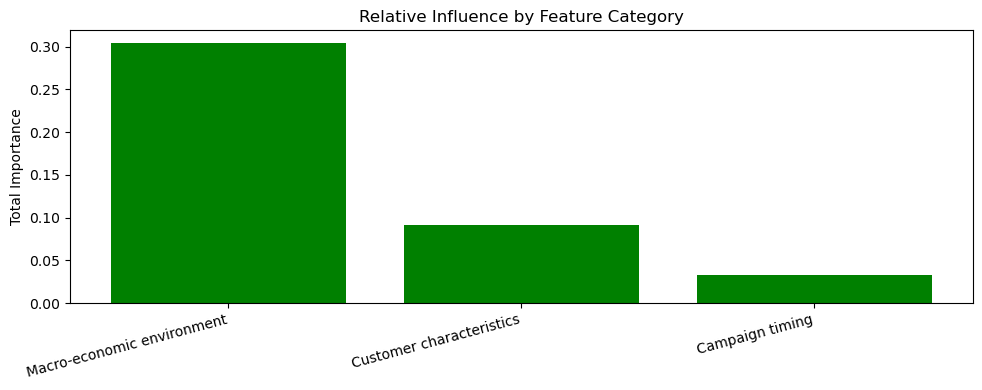

In [35]:
# -------------------------------------------------
#        Aggregate importance by category
# -------------------------------------------------
category_importance = (
    imp_df
    .groupby("category")["importance"]
    .sum()
    .sort_values(ascending=False)
)

color="#2ca02c"
plt.figure(figsize=(10, 4))

plt.bar(
    category_importance.index,
    category_importance.values,
    color="green"
)

plt.ylabel("Total Importance")
plt.title("Relative Influence by Feature Category")

# Rotated category labels
plt.xticks(rotation=15, ha="right") 

plt.tight_layout()
plt.show()


In [36]:
# -------------------------------------------------
#        Category Importance Values Table
# -------------------------------------------------
category_importance

category
Macro-economic environment    0.303953
Customer characteristics      0.091158
Campaign timing               0.033317
Name: importance, dtype: float64

#### E. Conclusion to relative influence of the category types of the features:

The macro-economic environment noticably has a greater impact on acceptance. Managers do not have influence over this and are unlikley to put off a campaign until the economy improves. However, at times when the economy is right, then extra campaigns would be very much worthwhile.

After the iconomic environment, the second category is customer features. So selecting particular top percentages of customers, where the return on effort is higher, will improve yield.

Then timing of the campaign will nudge the yield higher also. Focussing calls in Mondays and in October will be helpful.
   

## Final Executive Summary of the Detailed Analysis

### Model Selection
Logistic Regression achieved the strongest performance in terms of Precision–Recall AUC (PR AUC) compared with KNN, SVC, and Decision Tree models. After hyperparameter tuning, Logistic Regression remained the best-performing model, with the optimal configuration:

- C = 3  
- Penalty = L2  
- Solver = LBFGS  

The best PR AUC achieved was **0.429**, which was notably higher than that of the other models.

Although Logistic Regression was not the fastest model to train, it was **significantly faster than SVC by approximately two orders of magnitude**, making it a strong choice in both performance and efficiency.

### Business Insights

#### 1. Customer Characteristics
Customers were ranked by their predicted likelihood of acceptance, enabling a lift analysis. This showed that most of the value is captured early: beyond approximately the top 20% of ranked customers, each additional customer contacted yields substantially fewer acceptances.

Feature importance analysis of the best-performing model showed that customer characteristics contribute meaningfully to prediction accuracy.

#### 2. Macro-Economic Conditions
Several macro-economic indicators were found to be highly influential. This suggests that campaign effectiveness is sensitive to broader economic conditions, and that increasing campaign intensity during favourable conditions may improve acceptance rates.

#### 3. Timing
Campaign timing also matters. The analysis indicates that running campaigns on Mondays and during October is associated with higher acceptance rates.

#### 4. Contact Method
Customers with a landline telephone were more likely to accept when contacted via telephone, making this the preferred contact method for that customer segment.

**(End of Workbook)**
   